# U.S. Medical Insurance Costs Analysis: Project Overview and Findings

This notebook analyzes a dataset of US medical insurance costs to uncover insights about the factors affecting insurance charges.


# Project Scope and Goals

## Project Scope
This investigation aims to dissect a comprehensive dataset of healthcare insurance expenses in the United States. Our primary objective is to uncover key determinants influencing insurance premiums and to develop data-driven insights for the industry.

## Project Goals
- **Data Loading and Preprocessing**: Load the dataset, verify data integrity, and perform necessary preprocessing steps.
- **Exploratory Data Analysis (EDA)**: Examine the regional distribution of policyholders, contrast the costs between smokers and non-smokers, and determine the average age of individuals with at least one child.
- **Data Visualization**: Visualize the distribution of ages, the relationship between BMI and insurance charges, and the correlation between variables.
- **Model Building**: Construct and evaluate a linear regression model to predict insurance charges.
- **Bias Analysis**: Investigate potential systemic biases within the dataset, such as premium disparities based on sex.
- **Documentation and Reporting**: Compile findings into a well-structured Jupyter Notebook for easy review.


In [91]:
# Read the CSV File in Your Jupyter Notebook
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocess the Data
The dataset is preprocessed by dropping missing values and converting data types as necessary.

In [94]:
# Display data types and missing values

# Load and preprocess the dataset
with pd.option_context('mode.use_inf_as_na', True):
    # Convert infinite values to NaN and drop missing values
    data = data.replace([float('inf'), float('-inf')], pd.NA).dropna()
    data['age'] = data['age'].astype(int)  # Convert age to integer

# Display the first few rows of the preprocessed dataset
data.head()

  with pd.option_context('mode.use_inf_as_na', True):


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis (EDA)

In [118]:
# Find average age of the patients
average_age = data['age'].mean()
print(f'Average Age of Patients: {round(average_age,0)}')

# Analyze where most people are from
region_counts = data['region'].value_counts()
print("\nGeographic Distribution of Individuals:\n", region_counts)

# Analyze the difference in costs between smokers vs. non-smokers
smoker_costs = data.groupby('smoker')['charges'].mean()
print("\nAverage Insurance Charges:\n", round(smoker_costs,2))

# Find the average age for a person who has at least one child
average_age_with_child = data[data['children'] > 0]['age'].mean()
print(f'\nAverage Age of Individuals with at Least One Child: {round(average_age_with_child,0)}')

Average Age of Patients: 39.0

Geographic Distribution of Individuals:
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Average Insurance Charges:
 smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64

Average Age of Individuals with at Least One Child: 40.0


# Data Visualization

## 1. Histogram of Ages
**Description**: This histogram shows the distribution of ages in the dataset.

**Insight**: Age spread shows a balanced distribution, with a slight peak in the 18 - 20 age bracket.

**Implication for Insurance Costs**: Insurance providers might consider the age distribution when pricing policies, as younger individuals generally have different risk profiles compared to older individuals.

C:\Users\kinse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


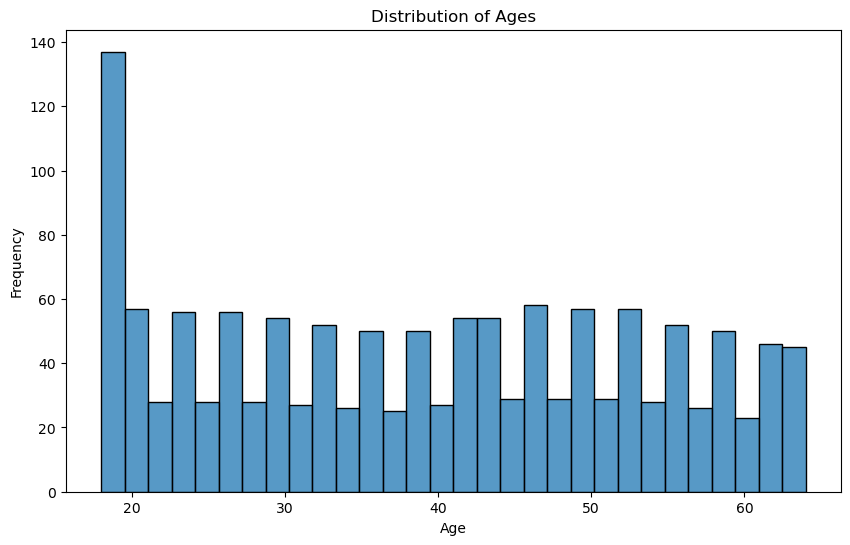

<Figure size 640x480 with 0 Axes>

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of ages to show the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.clf()

## 2. Scatter Plot: BMI vs. Charges

**Description**: Scatter diagram comparing Body Mass Index (BMI) to insurance premiums.

**Insight**: A noticeable upward trend in premiums as BMI increases, particularly beyond the 30 BMI threshold.

**Implication for Insurance Costs**: BMI could be a significant factor in premium calculations due to associated health risks associated with obesity.


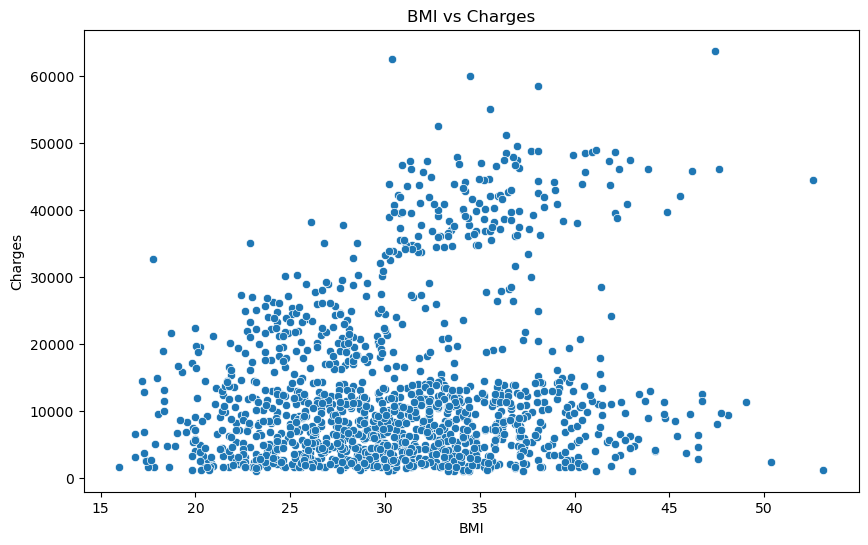

In [104]:
# Scatter plot: BMI vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

## 3. Correlation Heatmap

**Description**: This heatmap shows the correlation matrix of numerical variables.

**Insight**: 
- Strong positive correlation between charges and smoker.
- Moderate positive correlation with BMI and age.
- Weak positive correlation with the number of children.

**Implication for Insurance Costs**: Smoking status, BMI, and age are significant factors, suggesting that insurance companies could focus on these variables for risk assessment and premium calculation.


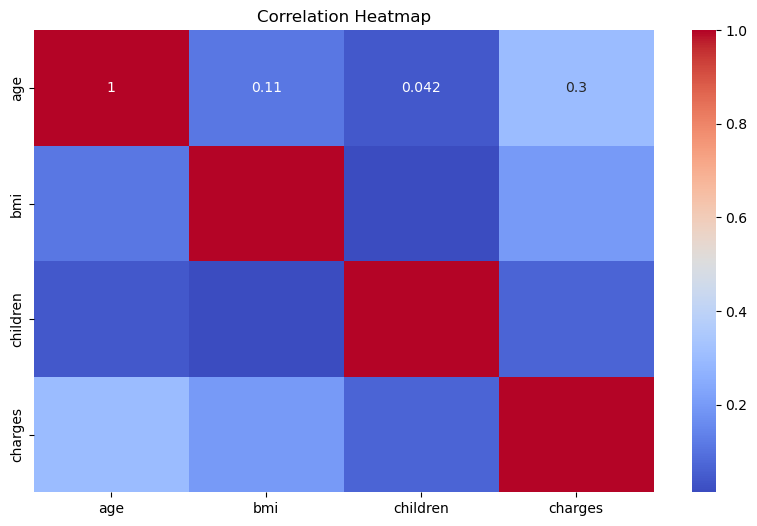

In [123]:
# Correlation heatmap to show correlation between numeric variables
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[float, int])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 4. Linear Regression Model (Actual vs. Predicted Charges)
**Description**: Scatter plot of actual vs. model-predicted premiums.


**Insight**: The model provides a baseline for predicting insurance charges but could be improved with more comprehensive data.

**Implication for Insurance Costs** The model provides a baseline for predicting insurance charges but could be improved with more comprehensive data.


Mean Squared Error: 131201335.64669806
R-squared: 0.15489592484270753


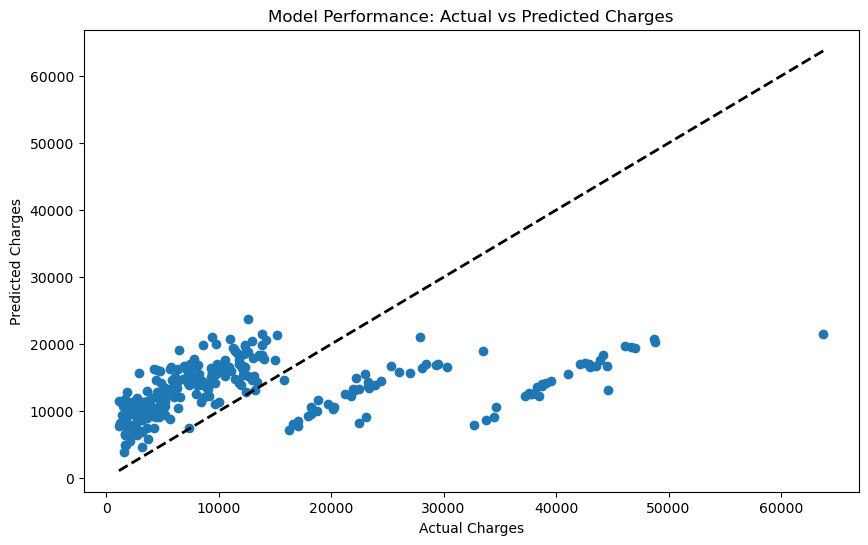

<Figure size 640x480 with 0 Axes>

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def build_linear_regression_model(X, y):
    """
    Build and evaluate a linear regression model.
    
    Parameters:
    X (pandas.DataFrame): Feature variables
    y (pandas.Series): Target variable
    
    Returns:
    tuple: Trained model, mean squared error, and R-squared score
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    return model, mse, r2, X_test, y_test, predictions

# Build and evaluate the linear regression model
X = data[['age', 'bmi', 'children']]
y = data['charges']

model, mse, r2, X_test, y_test, predictions = build_linear_regression_model(X, y)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Model Performance: Actual vs Predicted Charges')
plt.show()
plt.clf()

## 5. Box Plot: Charges by Sex
**Description**: This box plot compares insurance charges between males and females



**Insight**: Males generally have higher median charges, but the difference is minor compared to other factors like smoking status and BM


**Implication for Insurance Costs**: Gender may be a less critical factor in premium calculations compared to lifestyle and health indicators.


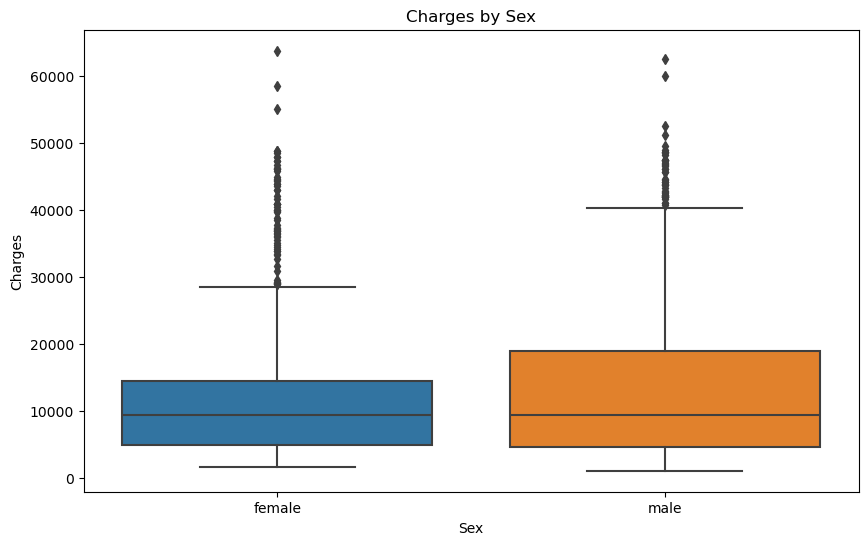

In [145]:
# Analyze and assess potential biases in the dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

# Conclusions and Strategic Recommendations

**Age, BMI, and Smoking Status are Key Factors**:
- **Insight**: These factors significantly influence insurance charges.
- **Action**: Develop tailored policies and risk management strategies for high-risk segments.

**Health-Related Variables Over Demographics**:
- **Insight**: Health-related variables show stronger correlations with premiums than demographic factors..
- **Action**: Enhance underwriting processes to focus more on health assessments and lifestyle indicatorss to better predict risk and determine premiums.

**Model Enhancement and Comprehensive Dataa**:
- **Insight**: The linear regression model is useful but can be improved with mor comprehensive data and analysis..
- **Action**: Expand the dataset, incorporate additional relevant variables, and explore more sophisticated modeling approaches to improve prediction accuracy and risk assessment.